In [58]:
pip install pandas pandas_datareader matplotlib scipy statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import polars as pl
import datetime as dt
import random
from sklearn import linear_model

In [60]:
# Load the first few rows of the US file with no parsing
us_5 = pd.read_csv('data/UST10Y.csv', nrows=5)
print(us_5.columns.tolist())
print(us_5.head())

['observation_date', 'DGS10']
  observation_date  DGS10
0       2020-06-16   0.75
1       2020-06-17   0.74
2       2020-06-18   0.71
3       2020-06-19   0.70
4       2020-06-22   0.71


In [61]:
import pandas as pd

# panda series = single column of data, with an index
s = pd.Series([2, 5, 7], index=['2020=01-01', '2020-01-02', '2020-01-03'])
print(s)

d = pd.DataFrame({'US_rate': [2.5,2.7,2.9], 'UK_rate': [1.5,1.6,1.7]},
                  index=['2020-01-01','2020-01-02','2020-01-03'])
print(d)

2020=01-01    2
2020-01-02    5
2020-01-03    7
dtype: int64
            US_rate  UK_rate
2020-01-01      2.5      1.5
2020-01-02      2.7      1.6
2020-01-03      2.9      1.7


In [62]:
us_raw = pd.read_csv('data/UST10Y.csv')
uk_raw = pd.read_csv('data/UKG10Y.csv')
us_raw.head()      # first 5 rows
us_raw.tail()      # last 5 rows


,observation_date,DGS10
1300,2025-06-10,4.47
1301,2025-06-11,4.41
1302,2025-06-12,4.36
1303,2025-06-13,4.41
1304,2025-06-16,4.46


In [63]:
us_raw.info()      # types, non-null counts
us_raw.describe()  # summary stats (mean, std, min, max…)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1305 non-null   object 
 1   DGS10             1251 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


,DGS10
count,1251.000000
mean,2.994165
std,1.363183
min,0.520000
25%,1.580000
50%,3.530000
75%,4.220000
max,4.980000


In [64]:
us_raw.columns     # list of column names
us_raw.index       # what’s your index? often dates in time-series

RangeIndex(start=0, stop=1305, step=1)

Start of DM rates transmission project

In [65]:
us1 = pd.read_csv('data/UST10Y.csv', parse_dates=['observation_date'], index_col='observation_date')
uk1 = pd.read_csv('data/UKG10Y.csv', parse_dates=['observation_date'], index_col='observation_date')

us1 = us1.rename(columns = {'DGS10' : 'US_10Y'})
uk1 = uk1.rename(columns = {'IRLTLT01GBM156N' : 'UK_10Y'})

# just a check
print("US 10-yr yields:", us1.head())
print("UK 10-yr yields:", uk1.head())
print(us1.index)
print(uk1.index)

US 10-yr yields:                   US_10Y
observation_date        
2020-06-16          0.75
2020-06-17          0.74
2020-06-18          0.71
2020-06-19          0.70
2020-06-22          0.71
UK 10-yr yields:                   UK_10Y
observation_date        
2020-05-01        0.2743
2020-06-01        0.2780
2020-07-01        0.2094
2020-08-01        0.2717
2020-09-01        0.2730
DatetimeIndex(['2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-29',
               ...
               '2025-06-03', '2025-06-04', '2025-06-05', '2025-06-06',
               '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
               '2025-06-13', '2025-06-16'],
              dtype='datetime64[ns]', name='observation_date', length=1305, freq=None)
DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01

In [66]:
#Combine data, only want index and yield column
df = pd.concat([ us1 ['US_10Y'], uk1 ['UK_10Y'] ], axis = 1)
df = df.dropna()

#check
print(df.head())
print(df.info())

                  US_10Y  UK_10Y
observation_date                
2020-07-01          0.69  0.2094
2020-09-01          0.68  0.2730
2020-10-01          0.68  0.3058
2020-12-01          0.92  0.3224
2021-02-01          1.09  0.6222
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2020-07-01 to 2025-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   US_10Y  40 non-null     float64
 1   UK_10Y  40 non-null     float64
dtypes: float64(2)
memory usage: 960.0 bytes
None


,US_10Y,UK_10Y
US_10Y,1.000000,0.976215
UK_10Y,0.976215,1.000000


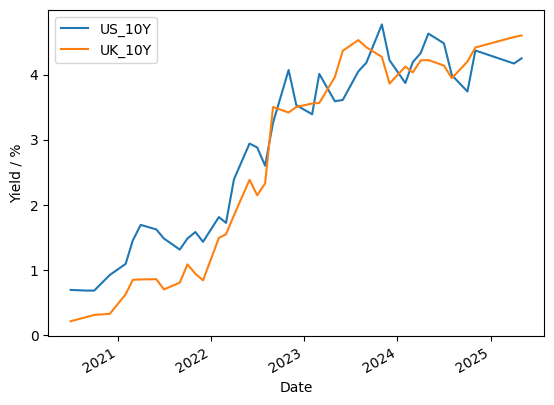

*Regression analysis stats*
Beta: 0.857212240383393
Intercept: -0.7131456813574828
R^2: 0.9529948729717018


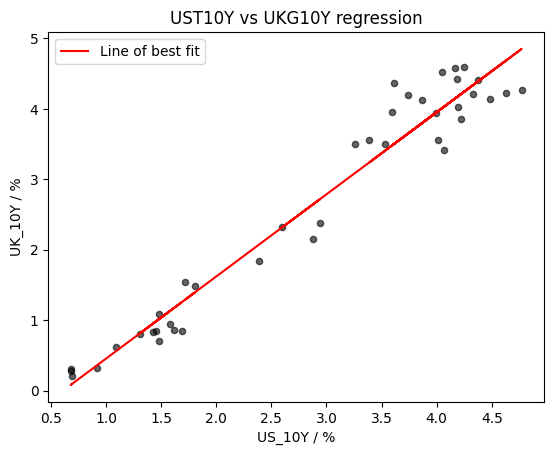

Number of points: 40


In [67]:
#Data visualisation + analysis
graph = df.plot(xlabel = 'Date', ylabel = 'Yield / %')

display(df.corr())

x = df ['US_10Y']
y = df ['UK_10Y']
res = stats.linregress(x, y)
plt.show()

print('*Regression analysis stats*')
print(f"Beta: {1 / res.slope}")
print(f"Intercept: {res.intercept}")
print(f"R^2: {res.rvalue**2}")

plt.scatter(x, y, c = 'black',  s = 20, alpha = 0.6) #scatter plot, s for size, alpha for transparency 
plt.xlabel('US_10Y / %')
plt.ylabel('UK_10Y / %')
plt.title('UST10Y vs UKG10Y regression')
plt.plot(x, res.slope * x + res.intercept, 'r-', label = 'Line of best fit') #plot line of best fit, make it red
plt.legend()
plt.show()

print(f"Number of points: {len(x)}")


In [ ]:
#Realised UK 10Y gilt data on Fred was only monthly, rather than daily
#So only 40 points were left after data was cleaned
#Download daily 10Y gilt data from BoE (both UST and UKG data are nominal par yields, not zero-coupon)

boe_raw = pd.read_csv('data/boe_10y.csv')
print(boe_raw.columns)
display(boe_raw.head())
display(boe_raw.tail())

#noticed that the boe data is backwards, starts from 2025 goes back

Index(['Date', 'Yield from British Government Securities, 10 year Nominal Par Yield              [a]             IUDMNPY'], dtype='object')


,Date,"Yield from British Government Securities, 10 year Nominal Par Yield [a] IUDMNPY"
0,17 Jun 25,4.5360
1,16 Jun 25,4.5198
2,13 Jun 25,4.4930
3,12 Jun 25,4.4910
4,11 Jun 25,4.5732


,Date,"Yield from British Government Securities, 10 year Nominal Par Yield [a] IUDMNPY"
1362,22 Jan 20,0.7099
1363,21 Jan 20,0.7042
1364,20 Jan 20,0.7156
1365,17 Jan 20,0.6954
1366,16 Jan 20,0.7046


In [69]:
#Rename column to UK10Y
long_column= 'Yield from British Government Securities, 10 year Nominal Par Yield              [a]             IUDMNPY'
boe = boe_raw.rename(columns={ long_column: 'UK_10Y' })

#Fix data going backwards problem
boe['Date'] = pd.to_datetime(boe['Date'], format='%d %b %y') #convert column to datetime, specify format
boe = boe.sort_values('Date') #sort from oldest to newest
boe = boe.set_index('Date')
boe.head()

,UK_10Y
Date,
2020-01-16,0.7046
2020-01-17,0.6954
2020-01-20,0.7156
2020-01-21,0.7042
2020-01-22,0.7099


In [70]:
df_daily = pd.concat([us1 ['US_10Y'], boe ['UK_10Y']], axis = 1)
df_daily = df_daily.dropna()

display(df_daily.head()) #check


,US_10Y,UK_10Y
2020-06-16,0.75,0.2153
2020-06-17,0.74,0.2357
2020-06-18,0.71,0.3064
2020-06-19,0.70,0.2675
2020-06-22,0.71,0.2443


,US_10Y,UK_10Y
US_10Y,1.000000,0.983824
UK_10Y,0.983824,1.000000


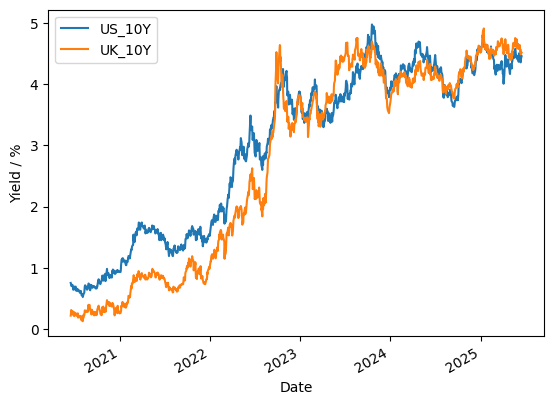

*Regression analysis stats*
Beta: 0.8406516636292498
Intercept: -0.8257052773133533
R^2: 0.9679098112112785


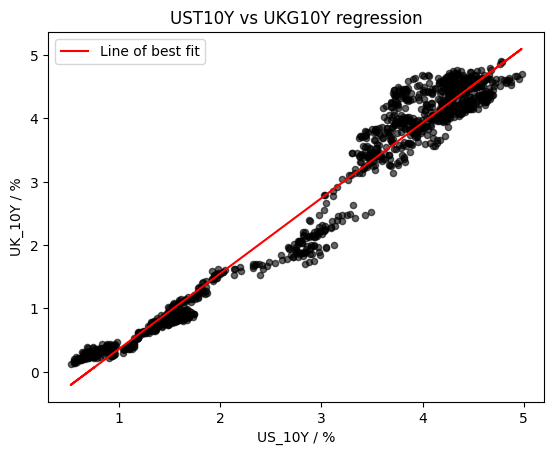

Number of points: 1223


In [71]:
#Data visualisation + analysis - same code as before
graph = df_daily.plot(xlabel = 'Date', ylabel = 'Yield / %')

display(df_daily.corr())

x = df_daily ['US_10Y']
y = df_daily ['UK_10Y']
res = stats.linregress(x, y)
plt.show()

print('*Regression analysis stats*')
print(f"Beta: {1 / res.slope}")
print(f"Intercept: {res.intercept}")
print(f"R^2: {res.rvalue**2}")

plt.scatter(x, y, c = 'black',  s = 20, alpha = 0.6) #scatter plot, s for size, alpha for transparency 
plt.xlabel('US_10Y / %')
plt.ylabel('UK_10Y / %')
plt.title('UST10Y vs UKG10Y regression')
plt.plot(x, res.slope * x + res.intercept, 'r-', label = 'Line of best fit') #plot line of best fit, make it red
plt.legend()
plt.show()

print(f"Number of points: {len(x)}")